In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.datasets import cifar10

(train_images,train_labels),(test_images,test_labels)= cifar10.load_data()

In [4]:
train_images.shape

(50000, 32, 32, 3)

In [5]:
train_labels.shape

(50000, 1)

In [6]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

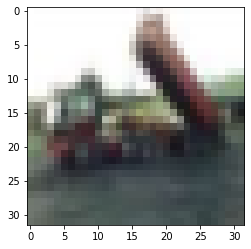

In [7]:
from matplotlib import pyplot as plt
plt.imshow(train_images[2],cmap="Greys")

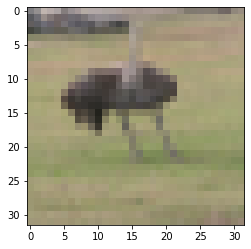

In [8]:
plt.imshow(train_images[42],cmap="magma")


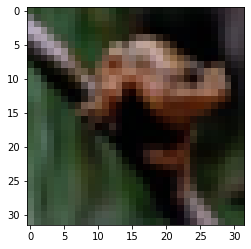

In [9]:
plt.imshow(train_images[5000],cmap="gray")


In [10]:
#Normalize ediyoruz resimleri
train_images=train_images/255.0
test_images=test_images/255.0

In [12]:
#Define the model architectrue
# Modelin mimarisini oluşturalım

model=keras.Sequential ([
    keras.layers.Conv2D(32,(3,3), activation=tf.nn.relu ,input_shape=(32,32,3)),
    keras.layers.Conv2D(64,(3,3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten() ,
    keras.layers.Dense(100,activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten() ,
    keras.layers.Dense(150,activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten() ,
    keras.layers.Dense(200,activation="relu"),
    # ... attach a new head to act as a classifier.
    keras.layers.BatchNormalization(),
    keras.layers.Flatten() ,
    keras.layers.Dense(10, activation='softmax')
    ])
# her resim 28 piksele 28 piksel o yüzden input_shape=(28,28) (1.)
# tamam 28 piksel ama onun 1 yani gri olduğunu gösteren bir şeyimiz yok bu sebeple bunu reshape(yeniden sekillendirmek)yapıyoruz(2.)
# derin öğrenme resimlere kendi ürettiği filtereleri kullanrak daha iyi sonuç buluyor Burda 12. fitreyi kullanıyor(3.)
# MaxPooling2D = aynı sayılardaki batch size gibi mesela bu örnekte hep 2 ye 2 piksel alıp götürcek(4.)
#Flatten bu layerlar katman katman Flatten bunları birleştiriyor (5.)
#

In [ ]:
# Train the digit classification model
model.compile(optimizer="adam",
 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
 metrics=["accuracy"])
model.summary()

In [19]:
from traitlets.traitlets import validate
model.fit(train_images,train_labels,
          epochs=10,validation_split=0.1,verbose=1)

Epoch 1/10
1407/1407 [==============================] - 174s 123ms/step - loss: 0.0566 - accuracy: 0.9807 - val_loss: 1.9382 - val_accuracy: 0.6840
Epoch 2/10
1407/1407 [==============================] - 167s 119ms/step - loss: 0.0526 - accuracy: 0.9823 - val_loss: 1.9989 - val_accuracy: 0.6794
Epoch 3/10
1407/1407 [==============================] - 166s 118ms/step - loss: 0.0497 - accuracy: 0.9831 - val_loss: 1.8807 - val_accuracy: 0.6840
Epoch 4/10
1407/1407 [==============================] - 166s 118ms/step - loss: 0.0495 - accuracy: 0.9828 - val_loss: 1.9893 - val_accuracy: 0.6820
Epoch 5/10
1407/1407 [==============================] - 170s 121ms/step - loss: 0.0455 - accuracy: 0.9841 - val_loss: 2.0462 - val_accuracy: 0.6822
Epoch 6/10
1407/1407 [==============================] - 169s 120ms/step - loss: 0.0513 - accuracy: 0.9828 - val_loss: 1.9773 - val_accuracy: 0.6890
Epoch 7/10
1407/1407 [==============================] - 169s 120ms/step - loss: 0.0463 - accuracy: 0.9844 - val_

In [20]:
_, accuracy=model.evaluate(test_images,test_labels)
# Normalde accuracy ile beraber bir şey daha var ama onu kullanmıcaz o sebeten mütevellit _, ile başladık . yani onu görmezden geldik
print("Accuracy:%.2f"%(accuracy*100))


313/313 [==============================] - 11s 34ms/step - loss: 2.0954 - accuracy: 0.6741
Accuracy:67.41
Accuracy:67.41
